In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import textblob
import wordcloud

In [11]:
climatetweet=pd.read_csv("/content/drive/MyDrive/Datasets/climatechange260623.csv")

In [12]:
climatetweet.head()

,Unnamed: 0,created_at,id,id_str,text,full_text,truncated,entities,source,in_reply_to_status_id,...,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,1,2023-06-25 13:30:01,1.672877e+18,1672877291108716544,#ClimateChange will be the defining issue of t...,#ClimateChange will be the defining issue of t...,False,"list(hashtags = list(text = ""ClimateChange"", i...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
1,2,2023-06-24 10:30:00,1.672470e+18,1672469600531800065,Lakes are a haven for biodiversity.\n\nHowever...,Lakes are a haven for biodiversity.\n\nHowever...,False,"list(hashtags = list(text = c(""ClimateChange"",...","<a href=""https://twitter.com"" rel=""nofollow"">T...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
2,3,2023-06-24 20:02:50,1.672614e+18,1672613760899399681,"#ClimateChange | ""Climate Change Affects Infla...","#ClimateChange | ""Climate Change Affects Infla...",False,"list(hashtags = list(text = c(""ClimateChange"",...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""popular"", iso_language_cod...",NaN,NaN,NaN,NaN,NaN
3,4,2023-06-26 09:38:45,1.673181e+18,1673181477561925633,#Ocean heat is off the charts\n#ClimateChange\...,#Ocean heat is off the charts\n#ClimateChange\...,False,"list(hashtags = list(text = c(""Ocean"", ""Climat...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,"list(result_type = ""recent"", iso_language_code...",NaN,NaN,NaN,NaN,NaN
4,5,2023-06-26 09:37:49,1.673181e+18,1673181244723699713,"@PeterWSinclair @JunkScience ""Carbon dioxide r...","@PeterWSinclair @JunkScience ""Carbon dioxide r...",False,"list(hashtags = list(text = c(""climatechange"",...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.673021e+18,...,NaN,NaN,NaN,NaN,"list(result_type = ""recent"", iso_language_code...",NaN,NaN,NaN,NaN,NaN


In [13]:
climatetweet.shape

(11003, 44)

In [14]:
tweet_txt=climatetweet.text

In [15]:
tweet_txt=tweet_txt.str.lower()

In [16]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [17]:
tweet_txt=[str(clean_txt(x)) for x in tweet_txt]

In [18]:
tweet_txt_df=pd.DataFrame(tweet_txt,columns=['tweet'])

In [19]:
from textblob import TextBlob

In [20]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [21]:
tweet_txt_df['sentiment']=[str(analyze_sentiment(x))
                          for x in tweet_txt_df.tweet]

In [22]:
tweet_txt_df.sentiment.value_counts()

Positive    5411
Neutral     3313
Negative    2279
Name: sentiment, dtype: int64

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
tweet_tokens=tweet_txt_df.tweet.apply(word_tokenize)

In [30]:
stop_english=set(stopwords.words("english"))

In [31]:
tweet_tokens=tweet_tokens.apply(lambda x:[w for w in x
                                          if w not in stop_english])

In [32]:
tweet_tokens.head()

0    [defining, issue, lifetimes, young, people, me...
1    [lakes, biodiversity, however, lakes, disappea...
2    [climate, change, affects, inflation, inflatio...
3    [heat, charts, https, co, aytvgphz, https, co,...
4    [carbon, dioxide, remains, thousands, years, f...
Name: tweet, dtype: object

In [33]:
from wordcloud import WordCloud

In [34]:
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=stop_english).generate(str(
    tweet_tokens))

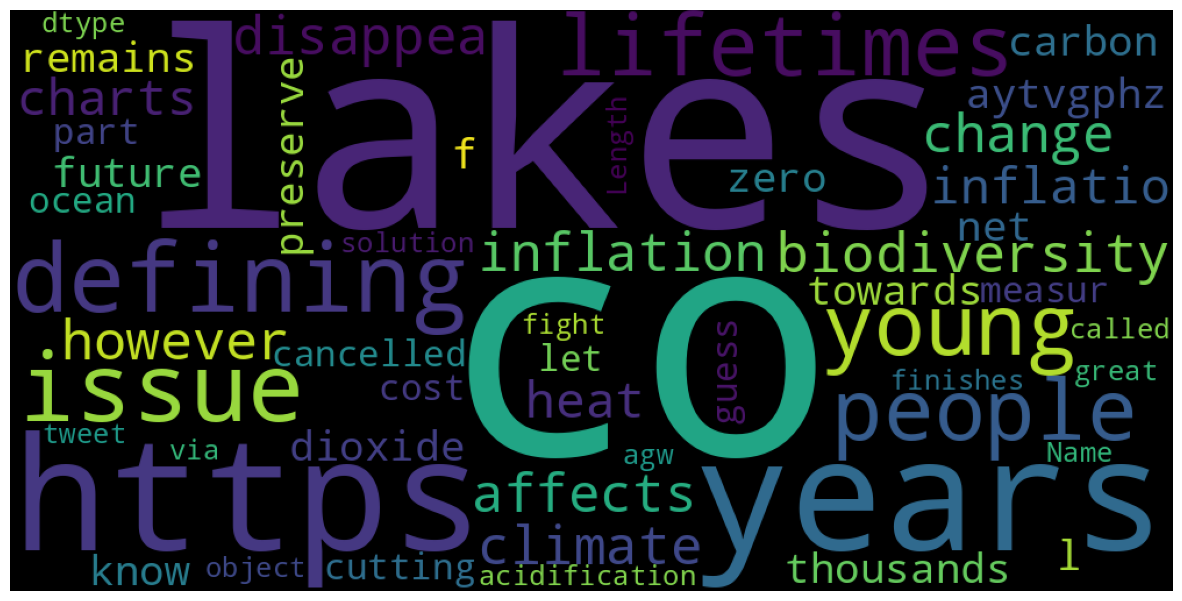

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
from nltk.probability import FreqDist
from nltk import flatten

In [37]:
tweet_tokens_list=tweet_tokens.to_list()

In [38]:
tweet_tokens_list=flatten(tweet_tokens_list)

In [39]:
tweet_tokens_list=[w for w in tweet_tokens_list if len(w)>2]

In [40]:
tweet_freq=FreqDist(tweet_tokens_list)

In [41]:
tweet_freq.most_common(100)

[('https', 12156),
 ('climate', 2802),
 ('amp', 2233),
 ('change', 1368),
 ('people', 972),
 ('global', 792),
 ('planet', 715),
 ('new', 682),
 ('world', 656),
 ('countries', 616),
 ('effects', 602),
 ('ice', 551),
 ('causing', 540),
 ('energy', 500),
 ('already', 499),
 ('comes', 472),
 ('today', 461),
 ('worst', 460),
 ('day', 459),
 ('responsible', 459),
 ('read', 455),
 ('least', 455),
 ('facing', 453),
 ('funds', 429),
 ('unlock', 421),
 ('thin', 411),
 ('one', 402),
 ('future', 400),
 ('need', 371),
 ('action', 365),
 ('warming', 359),
 ('like', 352),
 ('years', 350),
 ('help', 341),
 ('carbon', 337),
 ('impact', 330),
 ('emissions', 322),
 ('june', 321),
 ('weather', 320),
 ('via', 317),
 ('time', 315),
 ('earth', 303),
 ('let', 291),
 ('heat', 289),
 ('water', 288),
 ('learn', 286),
 ('impacts', 272),
 ('see', 263),
 ('could', 259),
 ('make', 259),
 ('fossil', 250),
 ('fight', 240),
 ('health', 239),
 ('must', 238),
 ('sustainable', 236),
 ('year', 230),
 ('join', 229),
 ('supp

In [42]:
remove_words=['https','via','amp']

In [43]:
tweet_tokens_list=[w for w in tweet_tokens_list if w not in remove_words]

In [45]:
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=stop_english).generate(str(
    tweet_tokens_list))

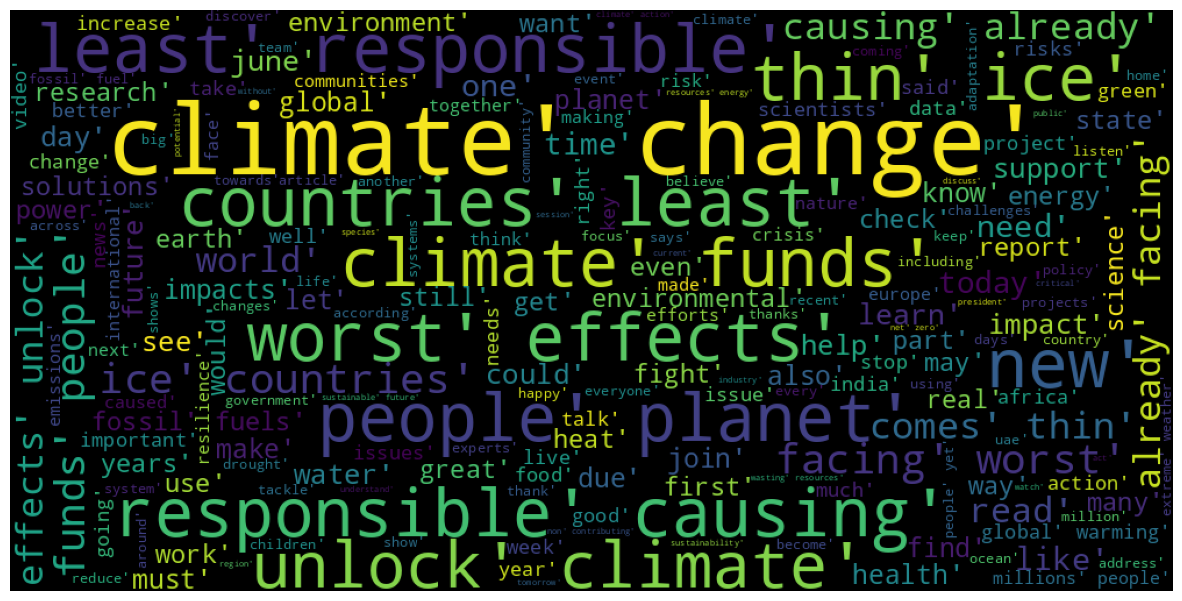

In [46]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
DTM=CountVectorizer(max_features=100,ngram_range=(2,2))

In [49]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_english)]))

In [50]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join(
    [word for word in x.split()
     if word not in (['https','via','amp'])]))

In [51]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join(
    [word for word in x.split() if len(word)>2]))

In [52]:
X_DTM=DTM.fit_transform(tweet_txt_df.tweet)

In [53]:
y=tweet_txt_df.sentiment
X=X_DTM

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
y=LabelEncoder().fit_transform(y)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logit=LogisticRegression(multi_class="multinomial",max_iter=2000)

In [58]:
logitmodel=logit.fit(X,y)

In [59]:
logitmodel.score(X,y)

0.5562119421975825

In [60]:
logitpredict=logitmodel.predict(X)

In [61]:
pd.crosstab(y,logitpredict)

col_0,0,1,2
row_0,,,
0,520,22,1737
1,11,310,2992
2,46,75,5290
